<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_Derivadas_e_integrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy.interpolate import lagrange
import sympy as sp


## Parte 1

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.0``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L$ es una constante de 0.98 H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee un metodo calcular la derivada numérica.

In [142]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

data = {'Tiempo(s)':t, 'Corriente(A)':i}
df= pd.DataFrame(data)
df


,Tiempo(s),Corriente(A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


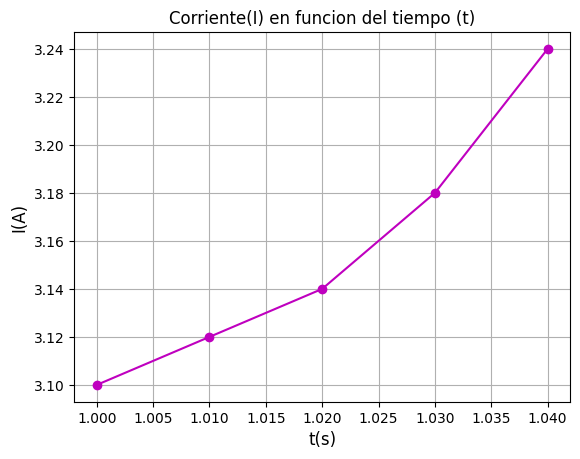

In [143]:
plt.figure()
plt.plot(df['Tiempo(s)'], df['Corriente(A)'], '.m-', markersize=12)
plt.title('Corriente(I) en funcion del tiempo (t)')
plt.xlabel('t(s)', fontsize=12)
plt.ylabel('I(A)', fontsize=12)
plt.grid()

In [144]:
derivada= np.gradient(i,t)

derivada


array([2., 2., 3., 5., 6.])

In [145]:
L= 0.98
R= 0.142
E_t= L*derivada+ R*i
df['Fem(V)']= E_t
df

,Tiempo(s),Corriente(A),Fem(V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


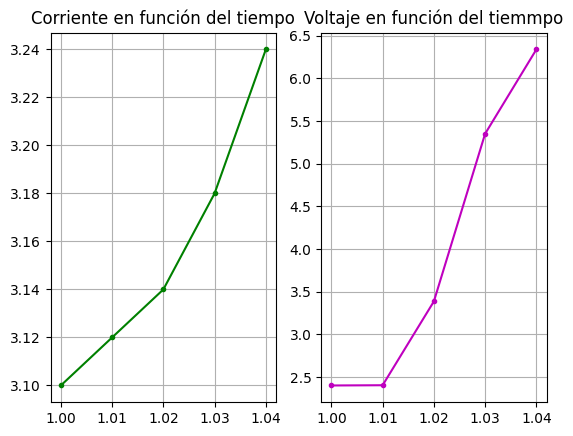

In [146]:
fig, axs= plt.subplots(1,2)
axs[0].plot(df['Tiempo(s)'], df['Corriente(A)'], '.g-')
axs[0].set_title('Corriente en función del tiempo')
axs[0].grid()
axs[1].plot(df['Tiempo(s)'], df['Fem(V)'], '.m-')
axs[1].set_title('Voltaje en función del tiemmpo')
axs[1].grid()

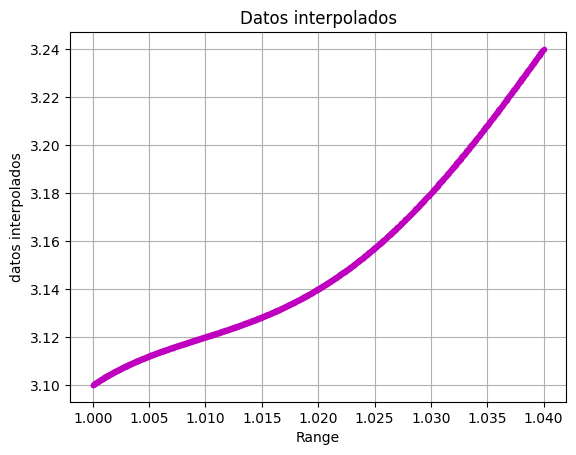

In [147]:

#polinomio de la grange
range= np.linspace(min(t),max(t),1000)
poli= lagrange(t,i)
plt.plot(range, poli(range),'.m-')
plt.title('Datos interpolados')
plt.xlabel('Range')
plt.ylabel('datos interpolados')
plt.grid()

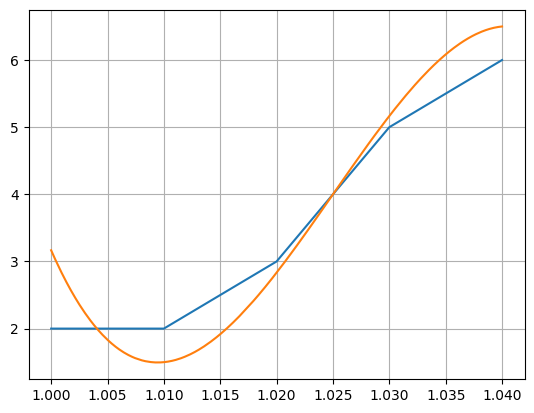

In [150]:
h= 1e-6
derivate= 1/(2*h)*(-3*poli(range)+4*poli(range + h)-poli(range+2*h))
plt.plot(df['Tiempo(s)'], derivada)
plt.plot(range,derivate)
plt.grid()

## Parte 2
1. Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.

2. Escribir en código Markdown la expresión para calcular una integral con la regla del simpson.

3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.

4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

Garantizando  que el error sea menor a $\varepsilon=1\times 10^{-5}$.

###**regla de trapecio**
dada la formula: $$\int_{a}^{b} f(x) dx = \frac {h}{2} [f(a) +2 \sum_{i=1}^{n-1} f(x_{i}) + f(b) ] $$

 donde $$h=\frac{b-a}{n}$$




In [38]:
"""
Punto 2
Regla del trapecio
"""


'\nPunto 2\nRegla del trapecio\n'

In [39]:
def In_trapezio(f,a,b,n): #FUnción, limite inferior, lim superior, y numero
  x=np.linspace(a,b, int(n))
  h=(b-a)/n
  I1=f(a)
  return h*(0.5)*(I1+2*np.sum(f(x[1:-1])+f(b)))

f1_ig=lambda x: 1/((np.tan(x))**(0.5))


con error: $$E=-\frac{(b-a)^{3}}{12n^{2}} f''(\xi)$$

In [40]:
x=sp.symbols("x")

f1_sp= -1/((sp.tan(x))**(0.5))
Df2=sp.diff(f1_sp,x,2)                     ### segunda derivada
Df2_np= sp.lambdify(x,Df2, 'numpy')       # Derivada  numpy
def maximizarf(f_sp,a,b):                 #Funcion a maiximizar en terminos de sp,a= limite inferior en el que va a evaluar y b=limite superior
  Df2=sp.diff(f_sp,x,2)
  Df2_np= sp.lambdify(x,Df2, 'numpy')
  Max=sc.optimize.minimize_scalar(Df2_np, bounds=(a,b))
  return Max.x
MAXF1=maximizarf(f1_sp,0.01,np.pi/2)

def Error_n(a,b,eps,fd2,max):   # Aqui hallamos el n
  E1=fd2(max)/(eps)*12
  E2=(-(b-a)**3)
  return  np.sqrt(E1*E2)
eps1=1*10**-5
N1=Error_n(0.01,np.pi/2,eps1,Df2_np,MAXF1)





In [41]:
f1_ig=lambda x: 1/((np.tan(x))**(0.5))
integralf1=In_trapezio(f1_ig,0.01,np.pi/2,N1)
integralf1
"""
Comparamos con scipy
"""
a=0.01
b=np.pi/2
x=np.linspace(a,b,584554)
ig_sc= sc.integrate.trapezoid(f1_ig(x),x)
Difere=integralf1-(ig_sc)
print(f'El resultado de la integral por medio de la regla del trapezio es {integralf1} y con scipy es {ig_sc}' )
print(f'la diferencia entre ellas es {Difere}')


El resultado de la integral por medio de la regla del trapezio es 2.0214373566084594 y con scipy es 2.021442135141479
la diferencia entre ellas es -4.778533019500486e-06


In [42]:
"""segunda integral
"""


'segunda integral\n'

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

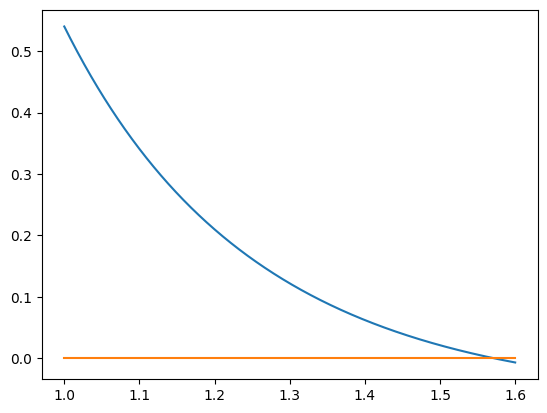

In [237]:
f2_ig=lambda x: np.cos(x)/(x**3)
f1=lambda x: 0*x
xss=np.linspace(1,1.6,1000)
plt.plot(xss,f2_ig(xss))
plt.plot(xss,f1(xss))
#f2_sp=sp.cos(x)/(x**3)

#Error_n(a,b,eps,fd2,max)
vv=np.linspace(1,2,1001)
for i in np.arange(1000):
  eps=1e-7
  y1=(In_trapezio(f2_ig,1,vv[i],344010))
  y2=(In_trapezio(f2_ig,1,vv[i+1],344010))
  if abs(y2-y1)<eps:
    print(y2)
    break



$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

In [129]:
"""
Regla Simpson

"""

'\nRegla Simpson\n\n'

####**Regla de Simpson Compuesta**

Con formula:
$$\int_{a}^{b} f(x) dx = \frac {h}{3} [f(a)+2 \sum_{j=1}^{(n/2)-1} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j}) + f(b)]$$

Y error:$$E=-\frac{b-a}{180} {h}^{4} {f}^{(4)}(\xi) =-\frac{{(b-a)}^{5}}{2880 {n}^{4}} {f}^{(4)}(\xi)$$


In [130]:

def Reglasimpson(f,a,b,n):
   x=np.linspace(a,b, int(n))
   h=(b-a)/n
   S1=4*np.sum(f(x[1:int((n))][::2]))
   S2=2*np.sum(f(x[2:int((n)-1)][::2]))
   ig=(h/3)*(f(a)+S1+S2+f(b))
   return ig


In [131]:


"""
Encotrar el n adecuado


"""
x=sp.symbols("x")

f1_sp= -1/((sp.tan(x))**(0.5))
Df4=sp.diff(f1_sp,x,4)
Df4_np= sp.lambdify(x,Df4, 'numpy')
def Er_nsimp(a,b,eps,fd4,max):   # Aqui hallamos el n
  E1=fd4(max)/((eps)*180)
  E2=(-(b-a)**5)
  return  (E1*E2)**(1/4)
Nsimp=Er_nsimp(0.01,np.pi/2,eps1,Df4_np,MAXF1)
Nsimp



2409.078695925782

In [132]:
Ig_simp=Reglasimpson(f1_ig,0.01,np.pi/2,Nsimp)

In [133]:

"""
Comparamos con scipy
"""
a=0.01
b=np.pi/2

x=np.linspace(a,b,int(Nsimp))
ig_simp= sc.integrate.simpson(f1_ig(x),x)
Difsimp=ig_simp-Ig_simp
print(f'El resultado de la integral por medio de la regla de Simpson es {Ig_simp} y con scipy es {ig_simp}' )
print(f'la diferencia entre ellas es {Difsimp}')


El resultado de la integral por medio de la regla de Simpson es 2.020535688207976 y con scipy es 2.0214408142938427
la diferencia entre ellas es 0.00090512608586657


In [134]:
"""
Segunda integral
"""

'\nSegunda integral\n'

In [135]:
for i in np.arange(1000):
  eps=1e-7
  y1=Reglasimpson(f2_ig,1,vv[i],Nsimp)
  y2=Reglasimpson(f2_ig,1,vv[i+1],Nsimp)
  if abs(y2-y1)<eps:
    print(y2)
    break


0.018088612667490407


Metodo de cuadratura

---
$$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\mathrm{dx}
 $$

----
$$
 \int_{1}^{\infty} \frac{\cos x}{x^3}\mathrm{dx}
 $$


----

$$
 \int_{0}^{\pi/4} \int_{0}^{\sin x} \frac{1}{\sqrt{1-y^2}}\mathrm{dxdy}
 $$

---

In [136]:
from scipy.integrate import quad



## Primera integral
cuad1=quad(f1_ig,0,np.pi/2)
print("Este es el resultado por el metodo de cuadratura de la primera integral",cuad1[0])
## Segunda integral
cuad2=quad(f2_ig,1, np.inf)
print("Este es el resultado por el metodo de cuadratura de la segunda integral",cuad2[0])
## Tercera integral
def integrand(x, y):
    return (1/(1-(y**2))**(1/2))
def y_integral(x):
    return quad(integrand, 0, np.sin(x), args=(x))[0]
cuad3 = quad(y_integral, 0, np.pi/4)
print("Este es el resultado por el metodo de cuadratura de la tercera integral",cuad3[0])


Este es el resultado por el metodo de cuadratura de la primera integral 2.2214414690792026
Este es el resultado por el metodo de cuadratura de la segunda integral 0.01811792007976691
Este es el resultado por el metodo de cuadratura de la tercera integral 0.36033449485443175


<ipython-input-136-4cffaff1dc78>:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  cuad2=quad(f2_ig,1, np.inf)


En las siguientes celdas intento hacer el metodo de cuadratura sin librerias, cosa que no resultó facil y lo hice por librerias luego,


In [137]:
from math import factorial as ft
from scipy import optimize as op

In [ ]:
"""
Primero cambio de limites, es decir una T.L. de [a,b] a [-1,1]
"""
def TL_integr(x, a,b):  #Cambio de variable
  return ((b-a)/2) *x + (b+a)/2
x,x1=sp.symbols("x, x1")
x1=TL_integr(x,0,sp.pi/2)

f2_sp= -((b-a)/2)/((sp.tan(x1))**(1/2))
I_1=sp.integrate(f1_sp, (x,0,sp.pi/2))
I_2=sp.integrate(f2_sp, (x, -1, 1))
I_2





-0.780398163397448*Integral(tan(pi*x/4 + pi/4)**(-0.5), (x, -1, 1))

In [ ]:
f3_ig=lambda y: 1/np.sqrt(1-y**2)

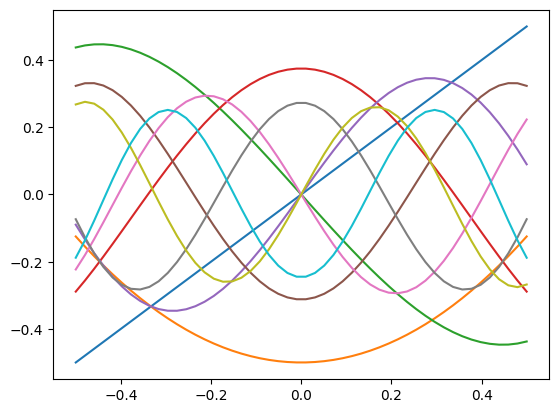

In [ ]:
"""
Ahora aproximamos la integral [-1,1] por medio del metodo de cuadratura
"""

PolLegendre=sp.zeros(10,1)
XX=np.linspace(-0.5,0.5)
for n in np.arange(1,11):
  p=1/((2**n)*ft(n))
  p2=sp.diff(((x**2)-1)**n,x,n)
  p3=sp.lambdify(x,p2,"numpy")
  p4=p*p3(x)
  p5=sp.lambdify(x,p4,"numpy")
  PolLegendre[n-1]=p4
  plt.plot(XX,p5(XX))f3_ig=lambda y: 1/np.sqrt(1-y**2)


In [ ]:
"""
def M_ctura(f,a,b,n):
  xi=np.linspace(a,b,n)
  x=sp.symbols("x")
  sum=0
  for i in np.arange(1,len(xi)+1):
    p1=(1-(xi[i]*2))
    p2=sp.diff(((PolLegendre[i])),x)
    p3=sp.lambdify(x,p2,"numpy")
    p4=(p3(xi[i]))**2
    wi=2/(p1*p4)
    sum=sum + (wi*f((np.pi*xi[i]/4)+(np.pi/4)))
    #print(xi[i],p1,p4,wi)
  return sum

M_ctura(f1_ig,0.01,np.pi/2,2)
"""
x==x




True

In [ ]:
f=lambda x: 1/((np.tan((np.pi*x/4)+(np.pi/4)))**(1/2))
f(1)
def M_ctura2(f,a,b):
  w1=1
  w2=1
  x1=-np.sqrt(3)/3
  x2=np.sqrt(3)/3
  Integral=-((b-a)/2)*(f(x1)+f(x2))
  return Integral
M_ctura2(f,0,np.pi/2)
def M_ctura3(f,a,b):
  x1=0.77459666692
  x2=0
  x3=-0.77459666692
  w1=0.5555555556
  w2=0.888888888
  w3=0.5555555556
  Integral=((b-a)/2)*(w1*f(x1)+w2*f(x2)+w3*f(x3))
  return Integral



"""
Mientras mas grande el n mejor presición habra, hasta ahora esta en n=3
"""
M_ctura3(f,0,np.pi/2)

1.9142773470682266

In [ ]:
"""
x=sp.symbols("x")
PolLegendre=sp.zeros(10,1)
for n in np.arange(1,11):
  p=1/((2**n)*ft(n))
  p2=sp.diff(((x**2)-1)**n,x,n)
  p3=sp.lambdify(x,p2,"numpy")
  p4=p*p3(x)
  PolLegendre[n-1]=p4
t1=sp.lambdify(x,PolLegendre[0],"numpy")
"""

'\nx=sp.symbols("x")\nPolLegendre=sp.zeros(10,1)\nfor n in np.arange(1,11):\n  p=1/((2**n)*ft(n))\n  p2=sp.diff(((x**2)-1)**n,x,n)\n  p3=sp.lambdify(x,p2,"numpy")\n  p4=p*p3(x)\n  PolLegendre[n-1]=p4\nt1=sp.lambdify(x,PolLegendre[0],"numpy")\n'

## Parte 3
Un péndulo físico en el regimen de pequeñas oscilaciones tiene un periodo de:

\begin{equation}
P_0=2\pi \sqrt{\frac{I_0}{mgb}}
\end{equation}

Cuando las oscilaciones no son pequeñas, podemos encontrar una expresión para el periodo como sigue:


La energia de un péndulo físico viene dada por:

\begin{equation}
E=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

En el punto más alejado de su posición de equilibrio, su energía es solo potencial y viene dada por:

\begin{equation}
Ep = mgb(1-\cos \theta),
\end{equation}

Igualando ambas expresiones tenemos que:

\begin{equation}
mgb(1-\cos \theta)=\frac{I_0\omega^2}{2}+mgb(1-\cos \theta)
\end{equation}

Integrando la ecuación respecto a $\theta$ y realizando la sustitución:

$\sin \phi = \frac{\sin \frac{\theta}{2}}{\sin \frac{\theta_0}{2}}$ y  $k = \sin \frac{\theta_0}{2}$, se puede encontrar  que el periodo de oscilación, viene dado en terminos de  la integral elíptica completa de primera especie:


\begin{equation}
P = \frac{2P_0}{\pi} \int _0^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

donde,  $P_0$ es el periodo de las oscilaciones pequeñas.

Determinar el periodo de oscilación de un péndulo. Para ello:

1. Suponga los párametros iniciales del pendulo.
2. Realice una buena planificación del código para calcular la integral.
3. Emplee un  método de integracion numérico que conozca.
4. Compruebe su solucion con el valor exacto de la integral mostrado en el punto

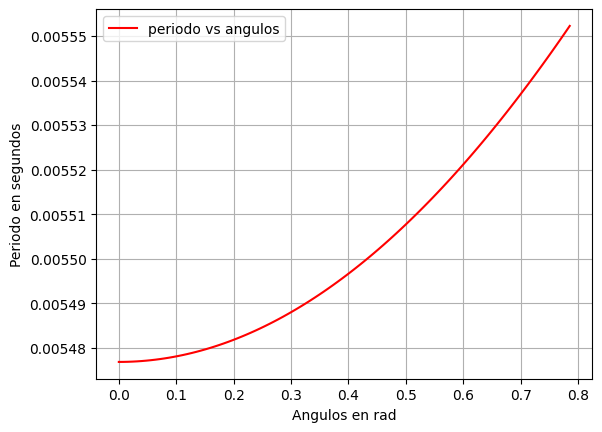

In [224]:

Thts=np.linspace(0,np.pi/4,100)

def Periodo(thta):
  I_0= 104.33e-6
  m= 5
  b= 0.7
  g= 9.8

  K=np.sin(thta/2)
  p2=lambda phi:1/(1-((K**2)*(np.sin(phi)**2)))**(1/2)
  p1=2*np.pi*np.sqrt((I_0/(m*g*b)))
  p3=Reglasimpson(p2,0,np.pi/4,int(Nsimp))
  return (2*p1/np.pi)*p3

Pdos=np.zeros(len(Thts))
for i,n  in enumerate(Thts):
  Pdos[i]=(Periodo(n))
plt.plot(Thts,Pdos,label="periodo vs angulos",c="r")
plt.xlabel("Angulos en rad")
plt.ylabel("Periodo en segundos")
plt.legend()
plt.grid()

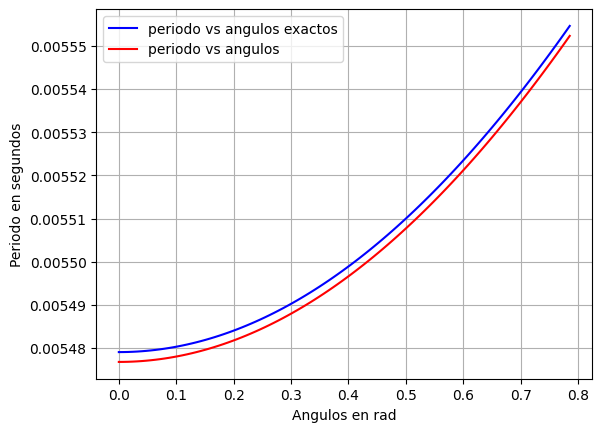

In [226]:
def Periodoexato(phi,thta):
  I_0= 104.33e-6
  m= 5
  b= 0.7
  g= 9.8
  K=np.sin(thta/2)
  p2=1/(1-((K**2)*(np.sin(phi)**2)))**(1/2)
  p1=2*np.pi*np.sqrt((I_0/(m*g*b)))
  return (2*p1/np.pi)*p2

Pdosx=np.zeros(len(Thts))
for i,n  in enumerate(Thts):
  Pdosx[i]=sc.integrate.quad(Periodoexato,0,np.pi/4,args=(n))[0]
plt.plot(Thts,Pdosx,label="periodo vs angulos exactos",c="b")
plt.plot(Thts,Pdos,label="periodo vs angulos",c="r")
plt.xlabel("Angulos en rad")
plt.ylabel("Periodo en segundos")
plt.legend()
plt.grid()

## Parte 4
The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integral evaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m)
\end{equation}


* $m_1 = 1-m$,

* $ 0 \le m \le1 $

* $\epsilon(m)\leq 3\times 10^{-5}$

* $a_0 = 1.3862944$

* $b_0 = 0.5$

* $a_1 = 0.1119723$

* $b_1 = 0.1213478$

* $a_2 = 0.00725296$

* $b_2 = 0.0288729$

In [234]:
def inte(phi):
  m=0.5
  return 1/(np.sqrt(1-(m*(np.sin(phi)**2))))
R1=Reglasimpson(inte,0,np.pi/2,10)
a0= 1.3862944
b0= 0.5
a1= 0.1119723
b1= 0.1213478
a2= 0.00725296
b2= 0.0288729

def integral_eliptica(m):
  m1 = 1 - m
  epsilon = 3e-5
  if m >=0 and m<=1:
    return a0 + a1*m1 + a2*m1 - ( b0 + b1*m1 + b2 * (m1**2))* np.log(m1) + epsilon
  else:
    return ('el valor de m debe pertenecer al rango')
print(f'El valor de la integral es {R1} y aproximado es {integral_eliptica(0.5)}')


El valor de la integral es 1.8908113832408118 y aproximado es 1.839569855305946


## Parte 5 (Opcional)

Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r


In [235]:
from scipy.integrate import quad
def K_cuadrado(r,theta,a):
   k_a= (4*a*r*np.sin(theta))
   k_b=((a**2)+(r**2)+(2*r*np.sin(theta)))
   k_2=k_a/k_b
   return k_2
def K(phi,K_2):
  return 1/np.sqrt(1-(K_2*(np.sin(phi))**2))


def K2(phi,K_2):
  return np.sqrt(1-(K_2*(np.sin(phi))**2))
K_k=quad(K,0,np.pi/2, args=(K_cuadrado(1,0.5,0.2)))
E_k=quad(K2,0,np.pi/2, args=(K_cuadrado(1,0.5,0.2)))
E_k


(1.4924914394234001, 1.656998360103801e-14)